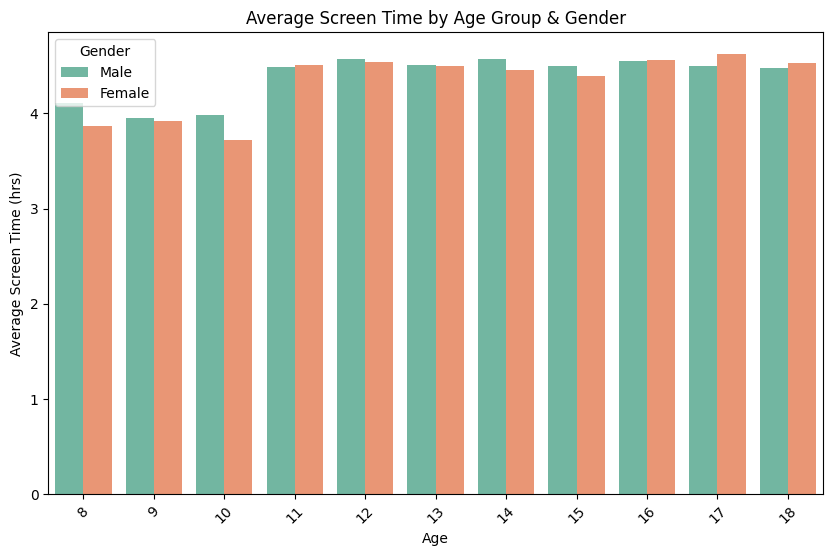

In [32]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('Indian_Kids_Screen_Time.csv')

seg_summary = df.groupby(['Age', 'Gender'])['Avg_Daily_Screen_Time_hr'].agg(['mean', 'count']).reset_index()
seg_summary = seg_summary.sort_values('mean', ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=seg_summary, x='Age', y='mean', hue='Gender', palette='Set2')
plt.title("Average Screen Time by Age Group & Gender", fontsize=12)
plt.ylabel("Average Screen Time (hrs)")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.show()

Age as the Key Divider Screen time increases steadily with age. The biggest jump occurs when children move from pre-teen to teenage years, and usage stays high through late teens.
Pre-teens (<13 years): Spend about 4.16 hours daily. Their time is split across several devices, mainly TVs and tablets, with more focus on educational content compared to older groups.

Teenagers (13–17 years): Average 4.50 hours per day. Smartphones dominate usage, and the balance shifts toward entertainment and recreation.

Late-teens (18+ years): Record the highest average at 4.53 hours daily. Their screen time revolves around personal devices like smartphones and laptops.

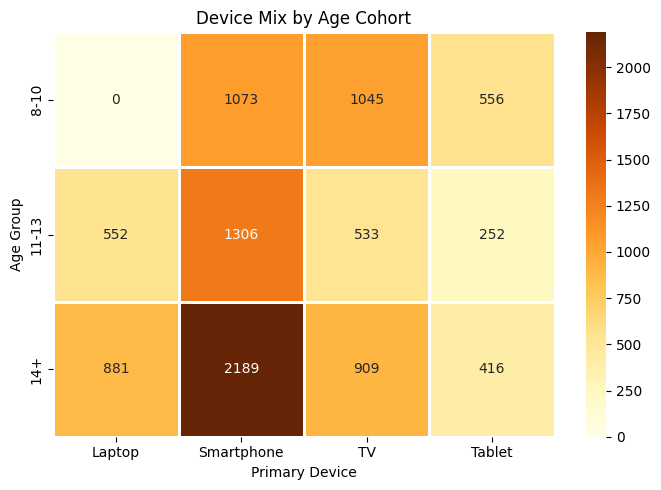

In [33]:
# Heatmap - Age_group × Primary_Device.
if 'Age' in df.columns:
    bins = [0,4,7,10,13,100]
    labels = ['0-4','5-7','8-10','11-13','14+']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
else:
    df['Age_Group'] = 'Unknown'
ct = pd.crosstab(df["Age_Group"], df["Primary_Device"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,
    fmt="d",
    cmap="YlOrBr",
    linewidths=1,       
    linecolor="white"
)
plt.title("Device Mix by Age Cohort")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.tight_layout()
plt.savefig("device_mix_heatmap.png")
plt.show()

Smartphone is the highly used primary device among 14+ age group.

11-13 age group uses laptop and TV more after Smartphone.

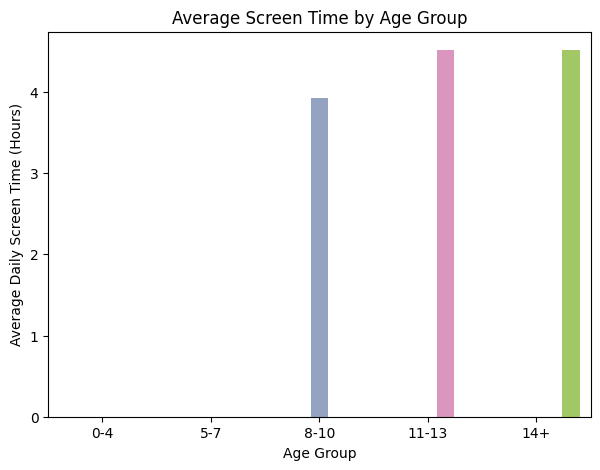

In [35]:
#Barplot - Average Screen Time by Age Group
plt.figure(figsize=(7,5))
sns.barplot(
    x="Age_Group", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    palette="Set2", 
    hue="Age_Group",
    errorbar=None
)
plt.title("Average Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.savefig("avg_screentime_by_age.png")
plt.show()

11-13 years and 14+ Age group average screen time is mostly 4 hours a day.

8-10 years age group screeen time is nearly 4 hours per day.


In [37]:
# Gender-wise summary statistics
gender_summary = df.groupby('Gender', observed=False)[
    'Avg_Daily_Screen_Time_hr'
].mean().reset_index()

gender_summary.rename(columns={
    'Avg_Daily_Screen_Time_hr': 'Avg Screen Time (hrs)',
}, inplace=True)

print(gender_summary)

   Gender  Avg Screen Time (hrs)
0  Female               4.327021
1    Male               4.377754


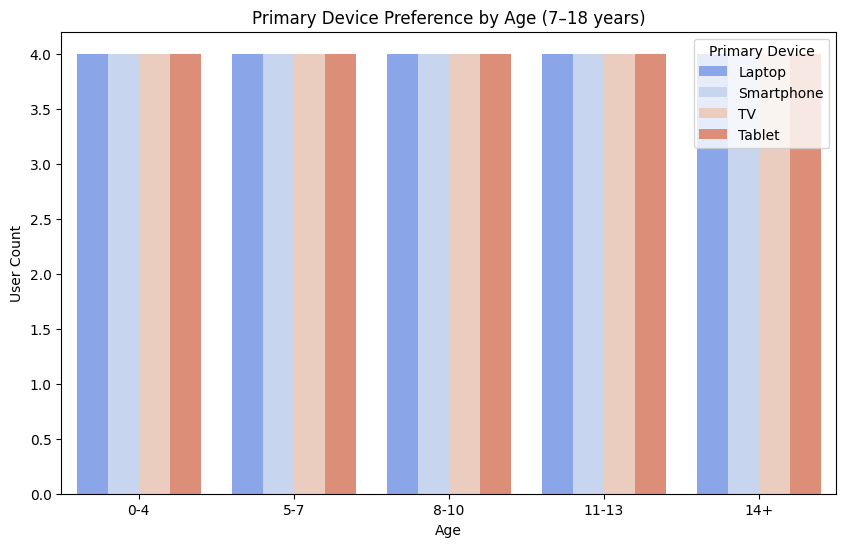

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=summary_table, x='Age_Group', hue='Primary_Device', palette='coolwarm')
plt.title('Primary Device Preference by Age (7–18 years)')
plt.xlabel('Age')
plt.ylabel('User Count')
plt.legend(title='Primary Device')
plt.show()

Tablets and TVs dominate among 7–10-year-olds due to shared family use.

Smartphones take over rapidly after age 13, showing early independence.

Laptops become popular around 15–18, often for study-related use.